# Dataset generator

```python
C = Circle
E = Ellipse
M = Moon
S = Star
F = Filament
Sq = Square
```

## Train datasets

In [29]:
import deeptrack as dt 
from numpy.random import uniform
import numpy as np
from Moon import Moon
from Star import Star
from square import Square
from matplotlib import pyplot as plt
from torch.utils.data import ConcatDataset
import torch

image_size = 32

particle_C = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 5)*dt.units.pixel,
        )

particle_E = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 12)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle_M = Moon(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            size=20*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle_S = Star(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 12)*dt.units.pixel,
            corner_extension=5*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle_F = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(1, 16)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle_Sq = Square(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            side_length= 15*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

optics = dt.Fluorescence(output_region=(0, 0, image_size, image_size), NA=2)

simulation_C = (
    optics(particle_C) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_E = (
    optics(particle_E) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_M = (
    optics(particle_M) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_S = (
    optics(particle_S) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_F = (
    optics(particle_F) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_Sq = (
    optics(particle_Sq) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

### 1 particle

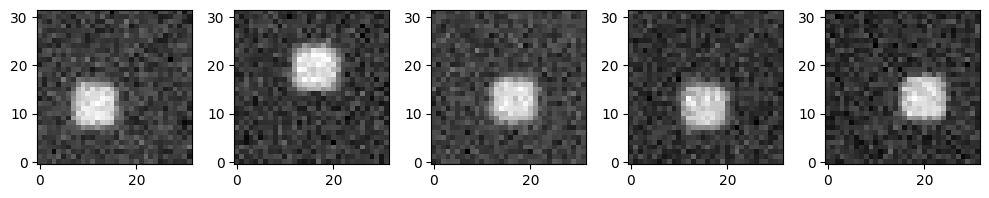

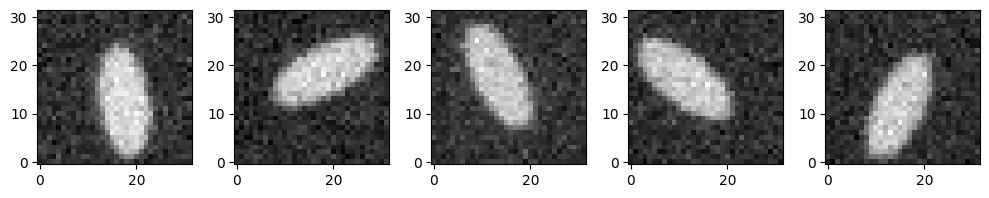

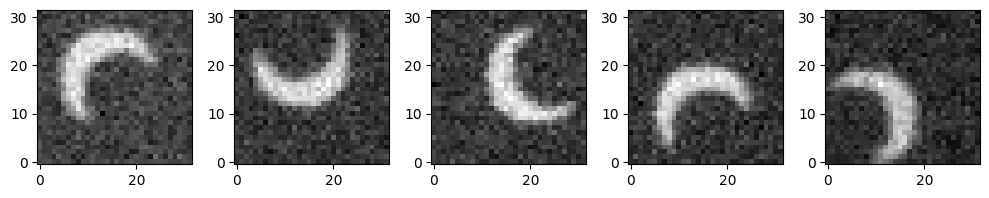

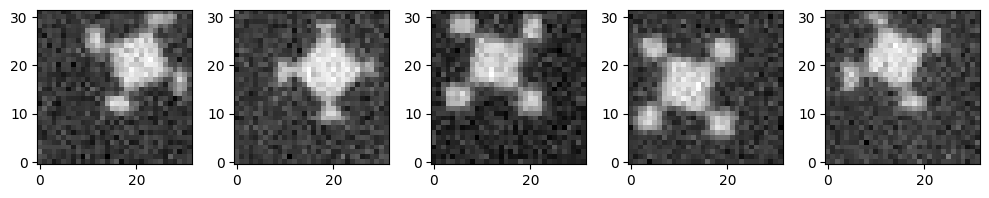

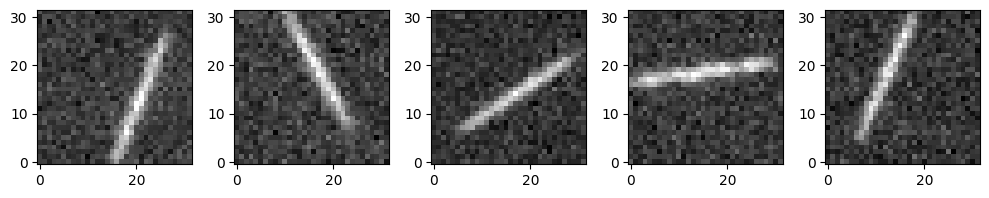

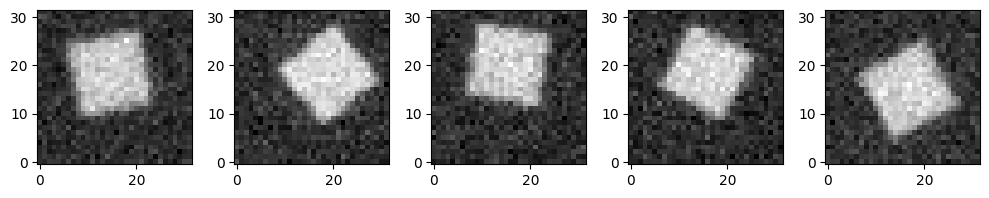

In [30]:
# Circle
train_dataset_C = dt.pytorch.Dataset(simulation_C & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_C[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Ellipse
train_dataset_E = dt.pytorch.Dataset(simulation_E & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_E[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Moon
train_dataset_M = dt.pytorch.Dataset(simulation_M & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_M[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Star
train_dataset_S = dt.pytorch.Dataset(simulation_S & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_S[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Filament
train_dataset_F = dt.pytorch.Dataset(simulation_F & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_F[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Square
train_dataset_Sq = dt.pytorch.Dataset(simulation_Sq & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_Sq[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 2 particles

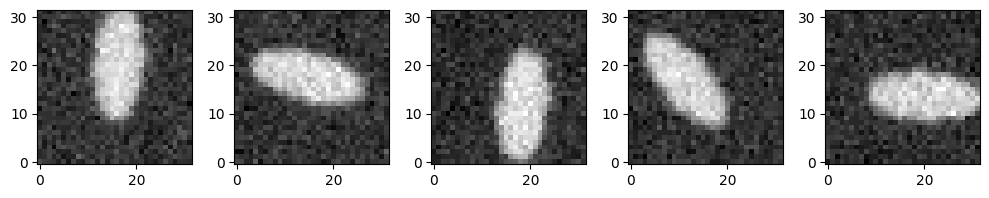

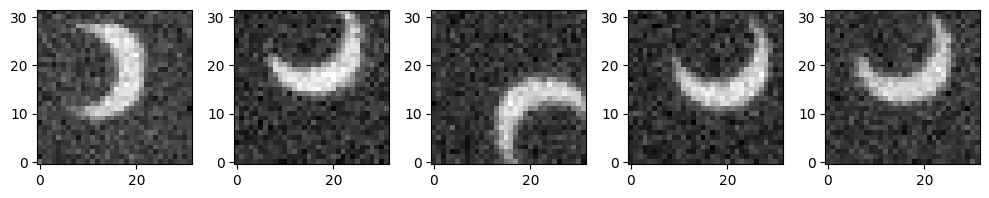

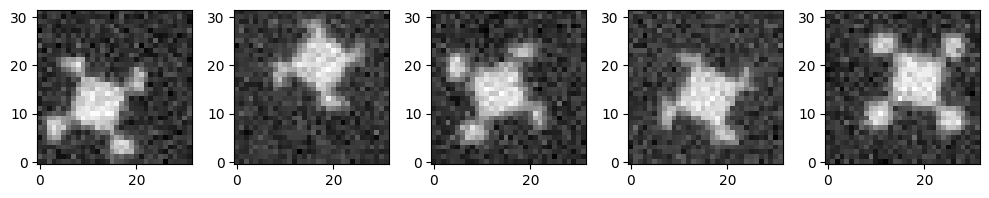

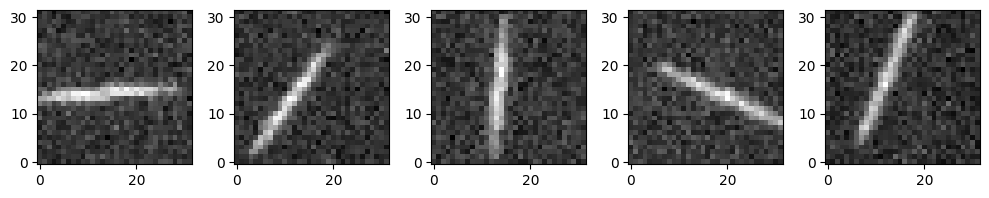

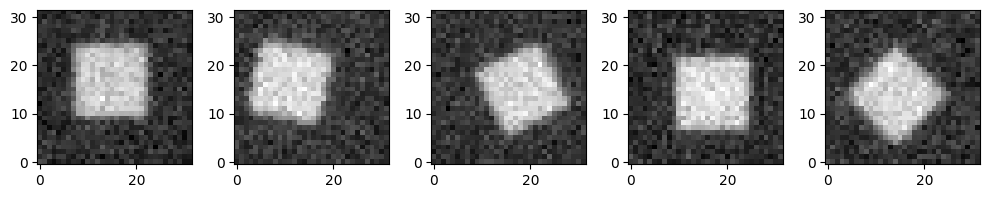

In [31]:
# Circle & Ellipse
train_dataset_CE = dt.pytorch.Dataset(simulation_E & [1], length=100)
train_dataset_CE = ConcatDataset([train_dataset_C, train_dataset_CE])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CE[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Moon
train_dataset_CM = dt.pytorch.Dataset(simulation_M & [1], length=100)
train_dataset_CM = ConcatDataset([train_dataset_C, train_dataset_CM])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CM[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Star
train_dataset_CS = dt.pytorch.Dataset(simulation_S & [1], length=100)
train_dataset_CS = ConcatDataset([train_dataset_C, train_dataset_CS])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CS[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Filament
train_dataset_CF = dt.pytorch.Dataset(simulation_F & [1], length=100)
train_dataset_CF = ConcatDataset([train_dataset_C, train_dataset_CF])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CF[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Square
train_dataset_CSq = dt.pytorch.Dataset(simulation_Sq & [1], length=100)
train_dataset_CSq = ConcatDataset([train_dataset_C, train_dataset_CSq])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CSq[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Ellipse & Square
train_dataset_ESq = dt.pytorch.Dataset(simulation_Sq & [1], length=100)
train_dataset_ESq = ConcatDataset([train_dataset_E, train_dataset_ESq])

### 3 particles

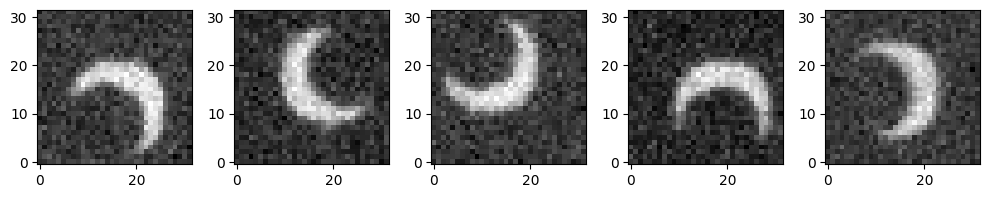

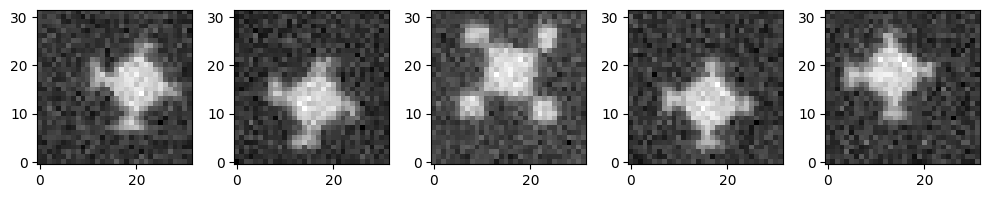

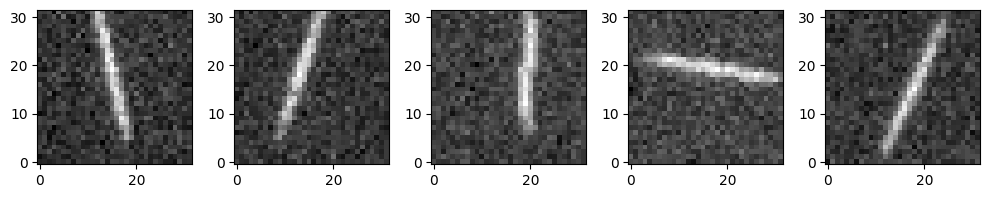

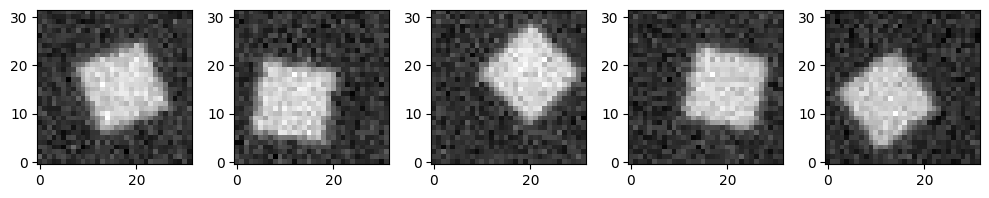

In [55]:
# Circle & Ellipse & Moon
train_dataset_CEM = dt.pytorch.Dataset(simulation_M & [2], length=100)
train_dataset_CEM = ConcatDataset([train_dataset_CE, train_dataset_CEM])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CEM[int(i+200)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Star
train_dataset_CES = dt.pytorch.Dataset(simulation_S & [2], length=100)
train_dataset_CES = ConcatDataset([train_dataset_CE, train_dataset_CES])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CES[int(i+200)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Filament
train_dataset_CEF = dt.pytorch.Dataset(simulation_F & [2], length=100)
train_dataset_CEF = ConcatDataset([train_dataset_CE, train_dataset_CEF])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CEF[int(i+200)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Square
train_dataset_CESq = dt.pytorch.Dataset(simulation_Sq & [2], length=100)
train_dataset_CESq = ConcatDataset([train_dataset_CE, train_dataset_CESq])

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_CESq[int(i+200)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

## Test datasets

In [38]:
class NonOverlappingPositions2(dt.Feature):
    def __init__(self, min_distance, **kwargs):
        self.min_distance = min_distance
        super().__init__(**kwargs)

    def __call__(self, image, **kwargs):
        pos1, pos2 = self.generate_non_overlapping_positions2(test_image_size, self.min_distance)
        self.properties["position1"] = pos1
        self.properties["position2"] = pos2
        return image

    @staticmethod
    def generate_non_overlapping_positions2(size, min_distance):
        """Generate two non-overlapping positions within the given size."""
        while True:
            pos1 = uniform(size / 2 - 30, size / 2 + 30, size=2)
            pos2 = uniform(size / 2 - 30, size / 2 + 30, size=2)
            if np.linalg.norm(pos1 - pos2) > min_distance:
                return pos1, pos2 
            
non_overlapping_positions2 = NonOverlappingPositions2(min_distance=15)

In [50]:
class NonOverlappingPositions3(dt.Feature):
    def __init__(self, min_distance, **kwargs):
        self.min_distance = min_distance
        super().__init__(**kwargs)

    def __call__(self, image, **kwargs):
        pos1, pos2, pos3 = self.generate_non_overlapping_positions3(test_image_size, self.min_distance)
        self.properties["position1"] = pos1
        self.properties["position2"] = pos2
        self.properties["position3"] = pos3
        return image

    @staticmethod
    def generate_non_overlapping_positions3(size, min_distance):
        """Generate two non-overlapping positions within the given size."""
        while True:
            pos1 = uniform(size / 2 - 30, size / 2 + 30, size=2)
            pos2 = uniform(size / 2 - 30, size / 2 + 30, size=2)
            pos3 = uniform(size / 2 - 30, size / 2 + 30, size=2)
            dist12 = np.linalg.norm(pos1 - pos2)
            dist13 = np.linalg.norm(pos1 - pos3)
            dist23 = np.linalg.norm(pos2 - pos3)
            
            if dist12 > min_distance and dist13 > min_distance and dist23 > min_distance:
                return pos1, pos2, pos3
                
non_overlapping_positions3 = NonOverlappingPositions3(min_distance=20)

In [53]:
test_image_size = 96
test_optics = dt.Fluorescence(output_region=(0, 0, test_image_size, test_image_size), NA=2)

test_particle_C = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position1"],
            radius=(5, 5)*dt.units.pixel,
        )

test_particle_E = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position2"],
            radius=(5, 12)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle_M = Moon(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position3"],
            size=20*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle_S = Star(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position3"],
			radius=(5, 12)*dt.units.pixel,
            corner_extension=5*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle_F = dt.Ellipse(
            intensity = 7.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position3"],
            radius=(1, 16)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle_Sq = Square(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: non_overlapping_positions3.properties["position3"],
            side_length= 15*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_simulation_C = (
    test_optics(test_particle_C)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_M = (
    test_optics(test_particle_M)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_S = (
    test_optics(test_particle_S)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_F = (
    test_optics(test_particle_F)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CE = (
    non_overlapping_positions2
    >> test_optics(test_particle_C & test_particle_E)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CM = (
    non_overlapping_positions2
    >> test_optics(test_particle_C & test_particle_M)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CS = (
    non_overlapping_positions2
    >> test_optics(test_particle_C & test_particle_S)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CF = (
    non_overlapping_positions2
    >> test_optics(test_particle_C & test_particle_F)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CSq = (
    non_overlapping_positions2
    >> test_optics(test_particle_C & test_particle_Sq)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_ESq = (
    non_overlapping_positions2
    >> test_optics(test_particle_E & test_particle_Sq)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CEM = (
    non_overlapping_positions3
    >> test_optics(test_particle_C & test_particle_E & test_particle_M)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CES = (
    non_overlapping_positions3
    >> test_optics(test_particle_C & test_particle_E & test_particle_S)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CESq = (
    non_overlapping_positions3
    >> test_optics(test_particle_C & test_particle_E & test_particle_Sq)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_CEF = (
    non_overlapping_positions3
    >> test_optics(test_particle_C & test_particle_E & test_particle_F)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

# No noise simulations (ground truths)

test_simulation_C_gt = (
    test_optics(test_particle_C)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_E_gt = (
    test_optics(test_particle_E)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_M_gt = (
    test_optics(test_particle_M)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_S_gt = (
    test_optics(test_particle_S)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_F_gt = (
    test_optics(test_particle_F)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

test_simulation_Sq_gt = (
    test_optics(test_particle_Sq)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

### 1 particle

In [ ]:
# Circle
test_dataset_C = dt.pytorch.Dataset(test_simulation_C & test_simulation_C_gt & test_particle_C.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_C[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Moon
test_dataset_M = dt.pytorch.Dataset(test_simulation_M & test_simulation_M_gt & test_particle_M.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, _, pos  = test_dataset_M[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
	plt.scatter(pos[1], pos[0], c='r')
plt.tight_layout()
plt.show()

# Star
test_dataset_S = dt.pytorch.Dataset(test_simulation_S & test_simulation_S_gt & test_particle_S.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, _, pos  = test_dataset_S[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
	plt.scatter(pos[1], pos[0], c='r')
plt.tight_layout()
plt.show()

# Filament
test_dataset_F = dt.pytorch.Dataset(test_simulation_F & test_simulation_F_gt & test_particle_F.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, sim, pos  = test_dataset_F[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(sim[0], cmap="gray", origin="lower")
	plt.scatter(pos[1], pos[0], c='r')
plt.tight_layout()
plt.show()

### 2 particles

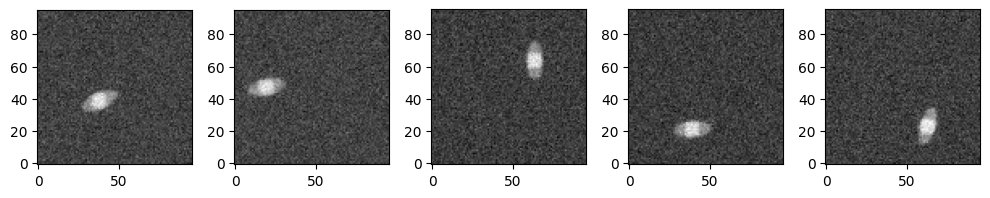

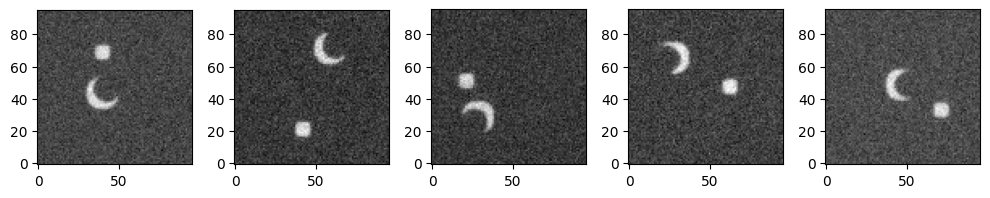

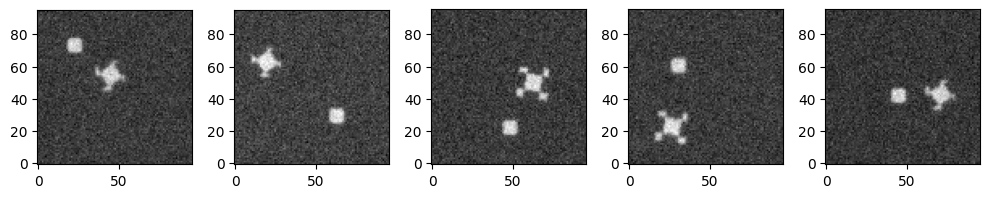

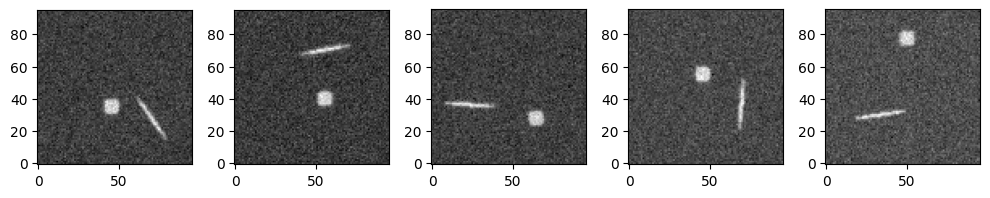

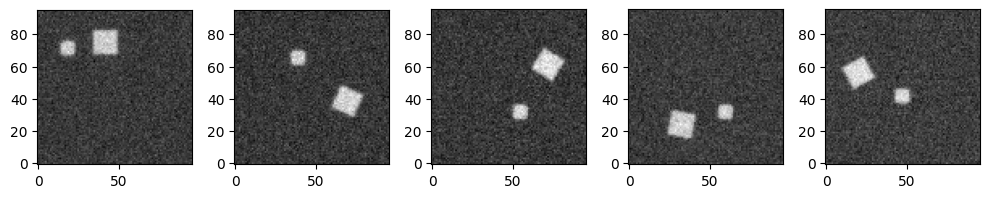

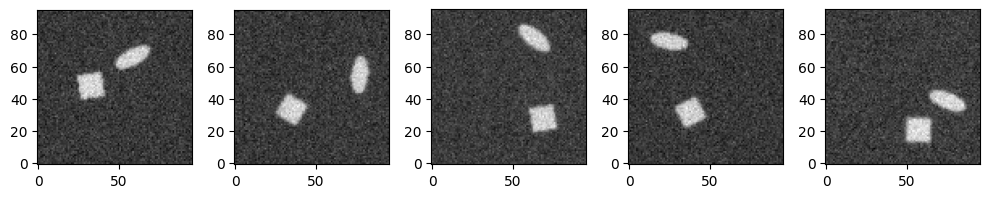

In [46]:
# Circle & Ellipse
test_dataset_CE = dt.pytorch.Dataset(test_simulation_CE & test_simulation_C_gt & test_simulation_E_gt & test_particle_C.position & test_particle_E.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CE[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Ciercle & Moon
test_dataset_CM = dt.pytorch.Dataset(test_simulation_CM & test_simulation_C_gt & test_simulation_M_gt & test_particle_C.position & test_particle_E.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CM[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Star
test_dataset_CS = dt.pytorch.Dataset(test_simulation_CS & test_simulation_C_gt & test_simulation_S_gt & test_particle_C.position & test_particle_S.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CS[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Filament
test_dataset_CF = dt.pytorch.Dataset(test_simulation_CF & test_simulation_C_gt & test_simulation_F_gt & test_particle_C.position & test_particle_F.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CF[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Square
test_dataset_CSq = dt.pytorch.Dataset(test_simulation_CSq & test_simulation_C_gt & test_simulation_Sq_gt & test_particle_C.position & test_particle_Sq.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CSq[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Ellipse & Square
test_dataset_ESq = dt.pytorch.Dataset(test_simulation_ESq & test_simulation_E_gt & test_simulation_Sq_gt & test_particle_E.position & test_particle_Sq.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_ESq[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 3 particles

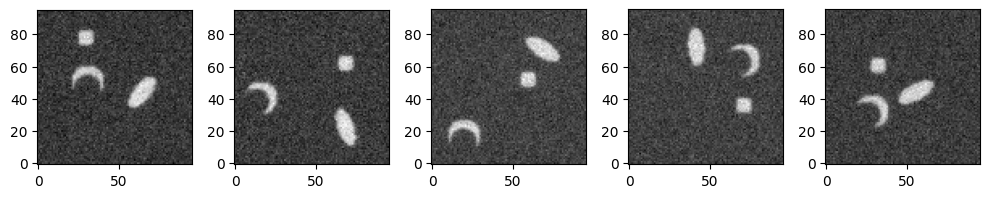

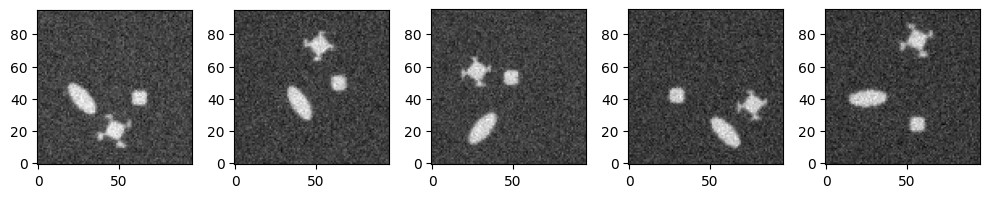

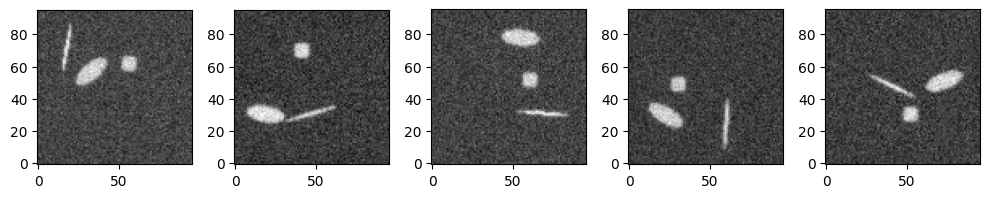

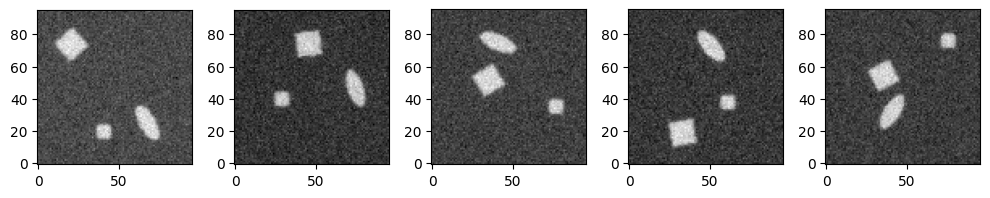

In [54]:
# Circle & Ellipse & Moon
test_dataset_CEM = dt.pytorch.Dataset(test_simulation_CEM & test_simulation_C_gt & test_simulation_E_gt & test_simulation_M_gt & test_particle_C.position & test_particle_E.position & test_particle_M.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CEM[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Star
test_dataset_CES = dt.pytorch.Dataset(test_simulation_CES & test_simulation_C_gt & test_simulation_E_gt & test_simulation_S_gt & test_particle_C.position & test_particle_E.position & test_particle_S.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CES[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Filament
test_dataset_CEF = dt.pytorch.Dataset(test_simulation_CEF & test_simulation_C_gt & test_simulation_E_gt & test_simulation_F_gt & test_particle_C.position & test_particle_E.position & test_particle_F.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CEF[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

# Circle & Ellipse & Square
test_dataset_CESq = dt.pytorch.Dataset(test_simulation_CESq & test_simulation_C_gt & test_simulation_E_gt & test_simulation_Sq_gt & test_particle_C.position & test_particle_E.position & test_particle_Sq.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset_CESq[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

## Dense dataset

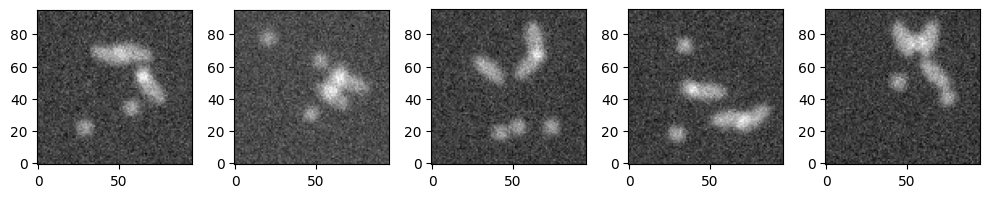

In [ ]:
three_particles1 = test_particle_C^3
three_particles2 = test_particle_E^3

dense_simulation = (
    test_optics(three_particles1 & three_particles2) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

dense_dataset = dt.pytorch.Dataset(dense_simulation, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
    image = dense_dataset[int(i)]  # Fetch image and label from the dataset
    image = image[0]  # Remove extra dimension
    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap="gray", origin="lower")  # Remove extra dimension
plt.tight_layout()
plt.show()

## Save the datasets

Copy and paste below whatever dataset you want to save to avoid reloading all of them

### 1 particle

In [81]:
# Dataset M
train_dataset_list = [(img, label) for img, label in train_dataset_M]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_dataset_M]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_M.pt')

# Dataset S
train_dataset_list = [(img, label) for img, label in train_dataset_S]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_dataset_S]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_S.pt')

# Dataset C
train_dataset_list = [(img, label) for img, label in train_dataset_C]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_dataset_C]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_C.pt')

# Dataset F
train_dataset_list = [(img, label) for img, label in train_dataset_F]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_dataset_F]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_F.pt')

### 2 particles

In [82]:
# Dataset CE
train_dataset_list = [(img, label) for img, label in train_dataset_CE]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_CE]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CE.pt')

# Dataset CM
train_dataset_list = [(img, label) for img, label in train_dataset_CM]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_CM]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CM.pt')

# Dataset CS
train_dataset_list = [(img, label) for img, label in train_dataset_CS]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_CS]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CS.pt')

# Dataset CF
train_dataset_list = [(img, label) for img, label in train_dataset_CF]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_CF]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CF.pt')

# Dataset CSq
train_dataset_list = [(img, label) for img, label in train_dataset_CSq]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_CSq]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CSq.pt')

# Dataset ESq
train_dataset_list = [(img, label) for img, label in train_dataset_ESq]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset_ESq]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_ESq.pt')

### 3 particles

In [56]:
# Dataset CEM
train_dataset_list = [(img, label) for img, label in train_dataset_CEM]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset_CEM]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CEM.pt')

# Dataset CES
train_dataset_list = [(img, label) for img, label in train_dataset_CES]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset_CES]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CES.pt')

# Dataset CEF
train_dataset_list = [(img, label) for img, label in train_dataset_CEF]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset_CEF]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CEF.pt')

# Dataset CESq
train_dataset_list = [(img, label) for img, label in train_dataset_CESq]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset_CESq]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset_CESq.pt')

### Others

In [84]:
# Dataset CE dense
test_dataset_list = [img for img in dense_dataset]
torch.save(test_dataset_list, 'dataset_CE_dense.pt')

## Load data example

In [85]:
"""
import torch
from torch.utils.data import Dataset, DataLoader

# Load the data from the file
dataset = torch.load('dataset1.pt')

# Extract the individual datasets
train_dataset1 = dataset['train']
test_dataset1 = dataset['test']

# Create a custom dataset class to make it compatible with the DataLoader
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

train_dataset1a = CustomDataset(train_dataset1)
test_dataset1 = CustomDataset(test_dataset1)

# Use the DataLoader
train_dataloader = DataLoader(train_dataset1, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset1, batch_size=8, shuffle=False)
"""


"\nimport torch\nfrom torch.utils.data import Dataset, DataLoader\n\n# Load the data from the file\ndataset = torch.load('dataset1.pt')\n\n# Extract the individual datasets\ntrain_dataset1 = dataset['train']\ntest_dataset1 = dataset['test']\n\n# Create a custom dataset class to make it compatible with the DataLoader\nclass CustomDataset(Dataset):\n    def __init__(self, data):\n        self.data = data\n\n    def __len__(self):\n        return len(self.data)\n\n    def __getitem__(self, idx):\n        return self.data[idx]\n\ntrain_dataset1a = CustomDataset(train_dataset1)\ntest_dataset1 = CustomDataset(test_dataset1)\n\n# Use the DataLoader\ntrain_dataloader = DataLoader(train_dataset1, batch_size=8, shuffle=True)\ntest_dataloader = DataLoader(test_dataset1, batch_size=8, shuffle=False)\n"